In [1]:
import matplotlib.pyplot as plt
from src_starter.train_valid_test_loader import load_train_valid_test_datasets
from src_starter.CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import numpy as np

epoch       0.000 | loss_total     1.37503 | train_AUC    0.50269 | train_MAE    1.00264 | valid_AUC     0.49616 | valid_MAE     1.00803 | grad_wrt_mu     0.25007 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     1.34410 | train_AUC    0.50717 | train_MAE    0.99689 | valid_AUC     0.50111 | valid_MAE     1.00177 | grad_wrt_mu     1.08438 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.44367 | train_AUC    0.51510 | train_MAE    0.97279 | valid_AUC     0.51694 | valid_MAE     0.97556 | grad_wrt_mu     0.52100 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00124 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.15575 | train_AUC    0.53693 | train_MAE    0.96094 | valid_AUC     0.53457 | valid_MAE     0.96278 | grad_wrt_mu     0.

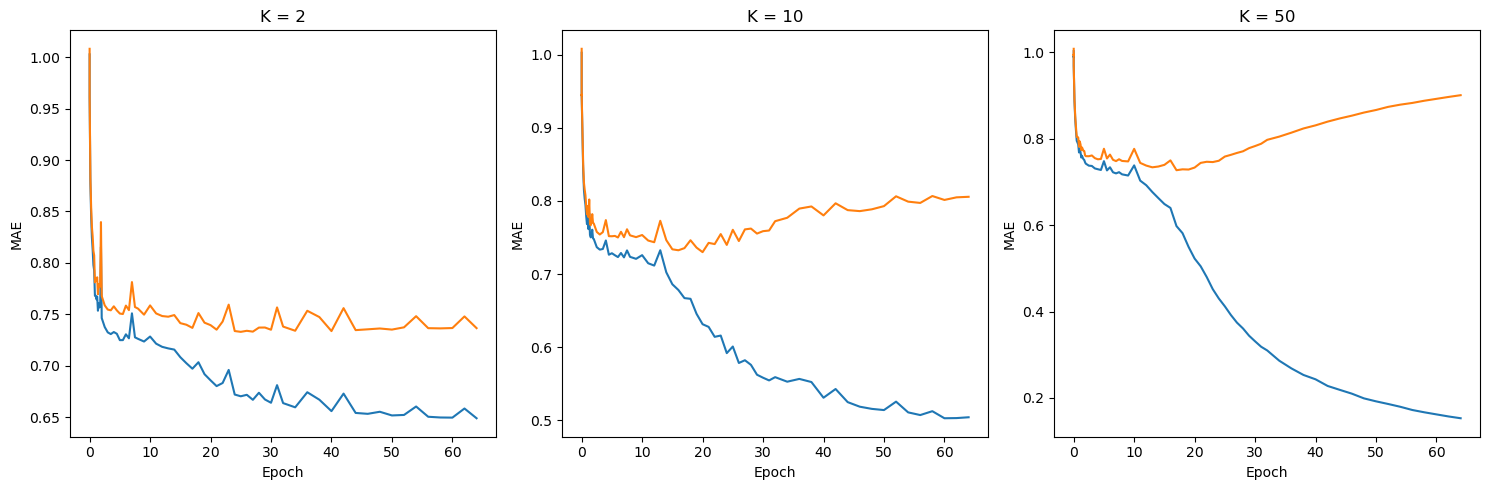

In [2]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
n_factors_list = [2, 10, 50]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(n_factors_list), figsize=(15, 5))

for i, n_factors in enumerate(n_factors_list):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=64, batch_size=32, step_size=0.2, n_factors=n_factors, alpha=0.0
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)
    
    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K = {n_factors}')

plt.tight_layout()
plt.show()

NameError: name 'GridSearchCV' is not defined

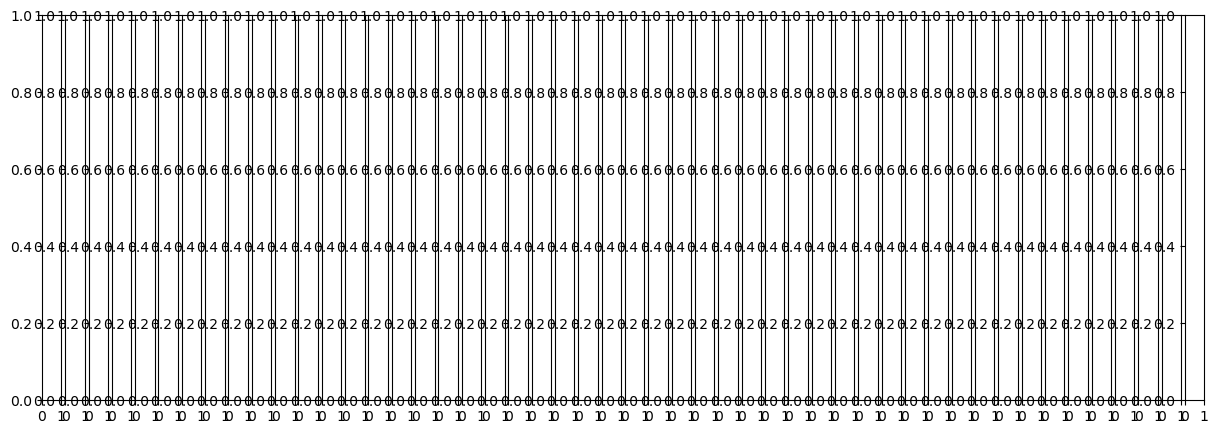

In [3]:
import itertools
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
alphas = [0.0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
batch_sizes = [16, 32, 64, 128, 256, 508, 1016, 2032, 4064, 8128]
step_sizes = [0.001, 0.005, 0.01, 0.05, 0.1]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(alphas), figsize=(15, 5))
best_maes_per_epoch = {}

for alpha, batch_size, step_size in itertools.product(alphas, batch_sizes, step_sizes):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=64, batch_size=batch_size, step_size=step_size, n_factors=50, alpha=alpha
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)

    best_mae = min(model.trace_mae_valid)

    best_maes_per_epoch[(batch_size, step_size, alpha)] = best_mae

best_combination = min(best_maes_per_epoch, key=best_maes_per_epoch.get)
best_mae = best_maes_per_epoch[best_combination]

# Train the model with the best combination and plot the MAE traces
best_batch_size, best_step_size, best_alpha = best_combination
model = CollabFilterOneVectorPerItem(
    n_epochs=n_epochs, batch_size=best_batch_size, step_size=best_step_size, n_factors=n_factors, alpha=best_alpha
)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)

plt.figure(figsize=(8, 6))
plt.plot(model.trace_epoch, model.trace_mae_train, label='Training')
plt.plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title(f'Best Model: K = {n_factors}, batch_size = {best_batch_size}, step_size = {best_step_size}, alpha = {best_alpha}')
plt.legend()
plt.show()